## UK Vaccinations Dataset 

This data contains information about the numbers of people who took first, second and third doses of the COVID-19 vaccination in different regions of the UK. The data is compiled from the UK government’s Coronavirus Vaccinations page and covers a period of time from earlier 2021 to mid 2022.  The attached "UK_VaccinationsData.xlsx" file contains both the data (first worksheet named ‘data’) and descriptions of the data variables (second worksheet named ‘variables' descriptions’)


## Libraries to be used

* Numpy
* Pandas
* Matplotlib
* Seaborn

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Question 1:
Generate descriptive statistics for the dataset, and comment on the main trends.

### Step 1: Reading and Understanding the Data
Let's start with the following steps:

* Importing data using the pandas library
* Understanding the structure of the data

In [2]:
# Load the dataframe
uk_vacc = pd.read_csv('UK_VaccinationsData.csv')

In [3]:
# checking the first 5 rows of the dataframe
uk_vacc.head()

,areaName,areaCode,year,month,Quarter,day,WorkingDay,FirstDose,SecondDose,ThirdDose,Booster
0,England,E92000001,2022.0,5,Q2,Mon,Yes,3034.0,3857.0,8747.0,1
1,England,E92000001,2022.0,5,Q2,Sun,No,5331.0,3330.0,4767.0,0
2,England,E92000001,2022.0,5,Q2,Sat,No,13852.0,9759.0,12335.0,0
3,England,E92000001,2022.0,5,Q2,Fri,Yes,5818.0,5529.0,10692.0,0
4,England,E92000001,2022.0,5,Q2,Thu,Yes,8439.0,6968.0,11701.0,0


In [4]:
# overview of the description of the data in the dataframe
uk_vacc.describe()

,year,month,FirstDose,SecondDose,ThirdDose,Booster
count,903.000000,904.000000,900.000000,901.000000,898.000000,904.000000
mean,2021.625692,5.946903,4994.323333,5574.125416,42529.570156,0.648230
std,0.484212,4.146467,9651.335670,9174.101390,104877.579915,0.477787
min,2021.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.000000,2.000000,338.500000,478.000000,1313.500000,0.000000
50%,2022.000000,4.000000,876.500000,971.000000,6992.000000,1.000000
75%,2022.000000,11.000000,3653.250000,5770.000000,23464.750000,1.000000
max,2022.000000,12.000000,115551.000000,48491.000000,830403.000000,1.000000


In [5]:
# checking the dimensionality  of the data frame
uk_vacc.shape

(904, 11)

**The dataframe contains 904 rows and 11 columns**

In [6]:
# checking information about the dataframe
uk_vacc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   areaName    904 non-null    object 
 1   areaCode    904 non-null    object 
 2   year        903 non-null    float64
 3   month       904 non-null    int64  
 4   Quarter     903 non-null    object 
 5   day         903 non-null    object 
 6   WorkingDay  902 non-null    object 
 7   FirstDose   900 non-null    float64
 8   SecondDose  901 non-null    float64
 9   ThirdDose   898 non-null    float64
 10  Booster     904 non-null    int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 77.8+ KB


## Question 2:
Check any records with missing values and handle the missing data as appropriate

In [7]:
uk_vacc.isna().sum()

areaName      0
areaCode      0
year          1
month         0
Quarter       1
day           1
WorkingDay    2
FirstDose     4
SecondDose    3
ThirdDose     6
Booster       0
dtype: int64

#### Handling missing or null values

* we will fill the null values in the column "year' of the dataframe with the mean of the column.

In [8]:
# Finding the mean of the year column
year_mean = uk_vacc['year'].mean()

In [9]:
int(year_mean)

2021

In [10]:
uk_vacc['year'] = uk_vacc['year'].fillna(value=int(year_mean))

In [11]:
uk_vacc['year'].isna().sum()

0

In [12]:
# finding the mean of the firstDose column
firstdose_mean = uk_vacc['FirstDose'].mean()

In [13]:
int(firstdose_mean)

4994

In [14]:
uk_vacc['FirstDose'] = uk_vacc['FirstDose'].fillna(value=int(firstdose_mean))


In [15]:
uk_vacc['FirstDose'].isna().sum()

0

In [16]:
# finding the mean of the SecondDose column
Seconddose_mean = uk_vacc['SecondDose'].mean()

In [17]:
int(Seconddose_mean)

5574

In [18]:
uk_vacc['SecondDose'] = uk_vacc['SecondDose'].fillna(value=int(Seconddose_mean))

In [19]:
uk_vacc['SecondDose'].isna().sum()

0

In [20]:
# finding the mean of the ThirdDose column
Thirddose_mean = uk_vacc['ThirdDose'].mean()

In [21]:
int(Thirddose_mean)

42529

In [22]:
uk_vacc['ThirdDose'] = uk_vacc['ThirdDose'].fillna(value=int(Thirddose_mean))

In [23]:
uk_vacc['ThirdDose'].isna().sum()

0

##### checking the number of categories in 'Quarter', 'day' and 'WorkingDay' columns of the dataframe

In [24]:
# Get number of categories in missing value columns
print("Number of categories in: ") 

for column in uk_vacc[["Quarter", "day", "WorkingDay"]]:
    print("{} = {}".format(column, len(uk_vacc[column].unique())))

Number of categories in: 
Quarter = 5
day = 8
WorkingDay = 3


### Frequent Categorical Imputation 

***Assumptions:*** Data is missing at random and there exist some missing values

***Description:*** Replacing missing values with the most frequent occured category in variable/column

***Implementation:*** 

Step 1: Find which category occurred most in each category using mode()

Step 2: Replace all missing values in that column with that category

Step 3: Drop original columns and keep newly imputed columns

In [25]:
Quarter_mode = uk_vacc["Quarter"].mode()

In [26]:
Quarter_mode

0    Q1
Name: Quarter, dtype: object

In [38]:
uk_vacc = uk_vacc[uk_vacc["Quarter"].notna()]

In [39]:
day_mode = uk_vacc['day'].mode()

In [40]:
day_mode

0    Sat
1    Sun
2    Thu
Name: day, dtype: object

In [41]:
uk_vacc = uk_vacc[uk_vacc["day"].notna()]

In [33]:
workingday_mode = uk_vacc['WorkingDay'].mode()

In [34]:
workingday_mode

0    Yes
Name: WorkingDay, dtype: object

In [42]:
uk_vacc = uk_vacc[uk_vacc["WorkingDay"].notna()]

Checking the dataframe after cleaning

In [43]:
uk_vacc.isna().sum()

areaName      0
areaCode      0
year          0
month         0
Quarter       0
day           0
WorkingDay    0
FirstDose     0
SecondDose    0
ThirdDose     0
Booster       0
dtype: int64

## Data Visualization

## Question 3

Build graphs visualizing the following and comment on the obtained visual insights

A.	the distribution of one or more individual continuous variables

B.	the relationship of a pair of continuous variables.

C.	the association b/w a categorical variable and a continuous one.


##### This data contains information about the numbers of people who took first, second and third doses of the COVID-19 vaccination in different regions of the UK. The dataframe contains discrete variables because they takes on distinct, countable values.

#### A continuous variable is any value that can be measured as decimals or fractions. These are infinitely situated between two values of reference. For example, there are infinite values between 1 and 2


### Therefore building a graph visualizing the distribution and relationships of continuous variable is insignificant in the UK vaccination data set

## Question 4

#### Display unique values of a categorical variable and their frequencies.

#### categorical variable in the  dataframe includes:

* areaName
* areaCode
* year
* month
* Quarter
* day
* WorkingDay
* Booster

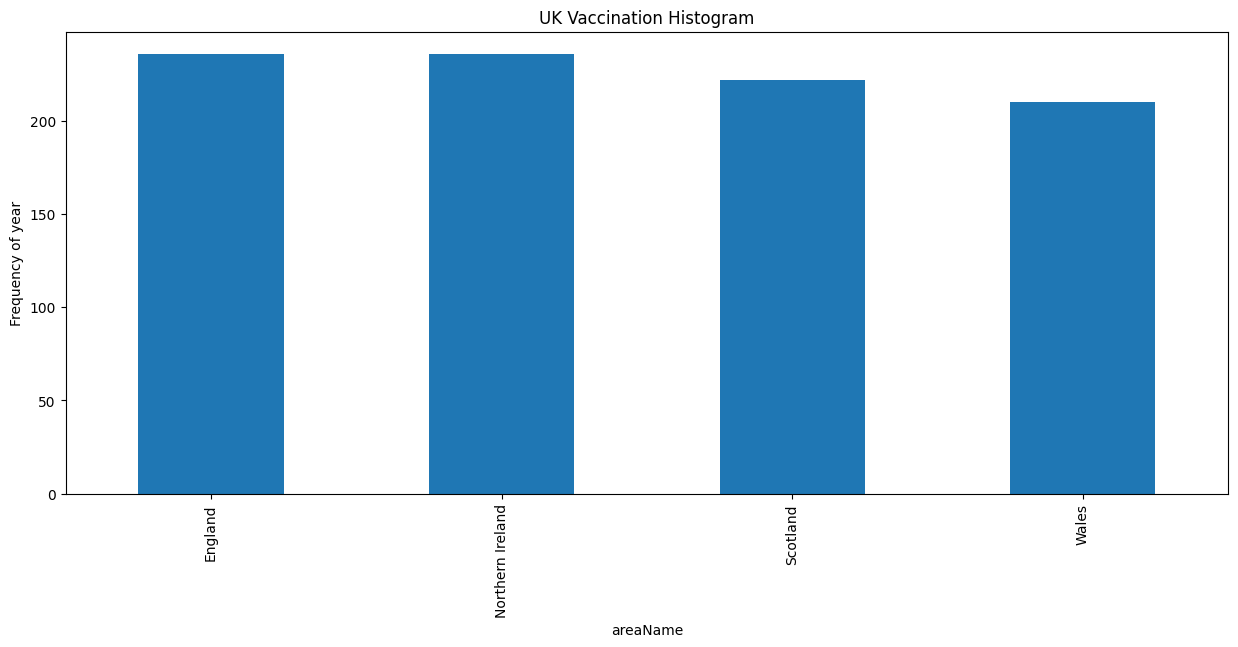

In [87]:
plt.figure(figsize=(15, 6))
plt1 = uk_vacc.areaName.value_counts().plot(kind='bar')
plt.title('UK Vaccination Histogram')
plt1.set(xlabel = 'areaName', ylabel='Frequency of year')
plt.show()

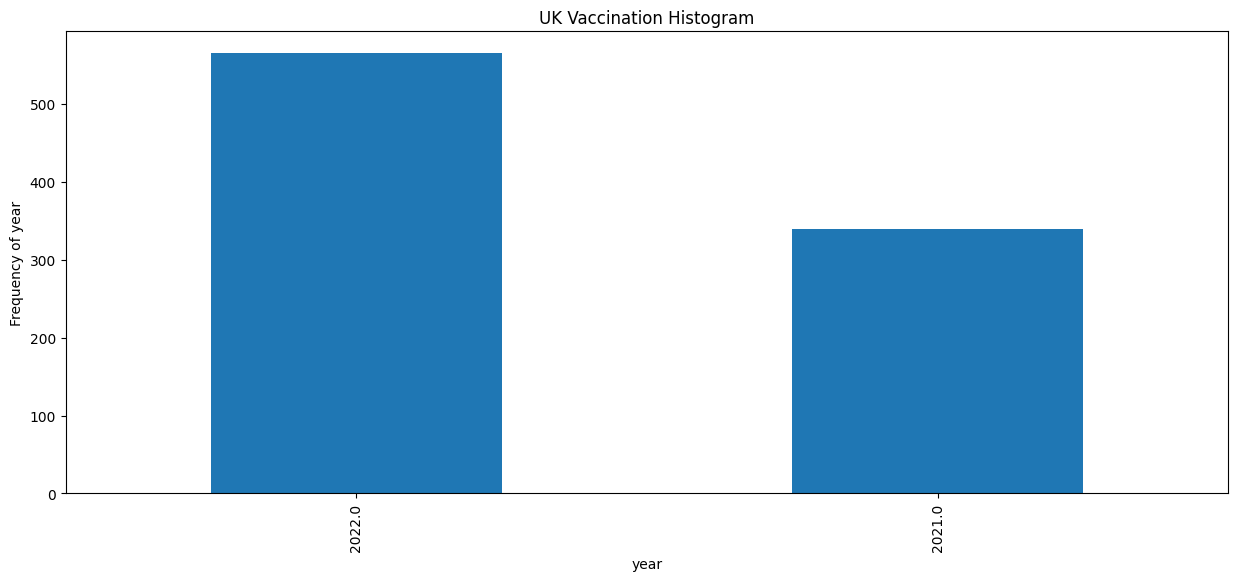

In [88]:
plt.figure(figsize=(15, 6))
plt1 = uk_vacc.year.value_counts().plot(kind='bar')
plt.title('UK Vaccination Histogram')
plt1.set(xlabel = 'year', ylabel='Frequency of year')
plt.show()

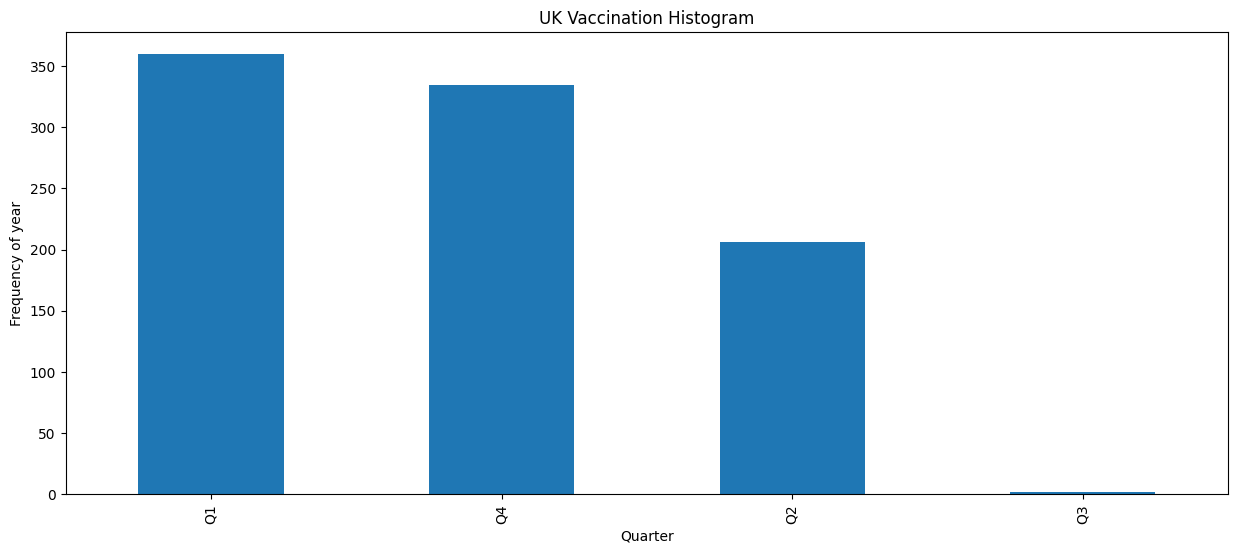

In [89]:
plt.figure(figsize=(15, 6))
plt1 = uk_vacc.Quarter.value_counts().plot(kind='bar')
plt.title('UK Vaccination Histogram')
plt1.set(xlabel = 'Quarter', ylabel='Frequency of year')
plt.show()

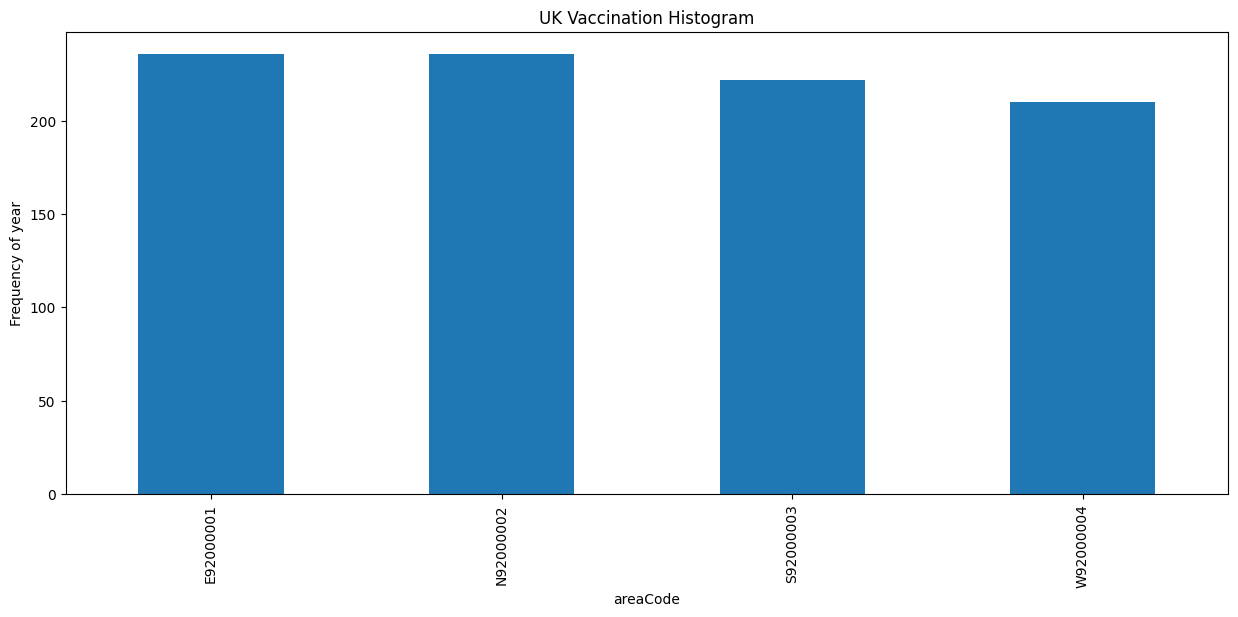

In [91]:
plt.figure(figsize=(15, 6))
plt1 = uk_vacc.areaCode.value_counts().plot(kind='bar')
plt.title('UK Vaccination Histogram')
plt1.set(xlabel = 'areaCode', ylabel='Frequency of year')
plt.show()

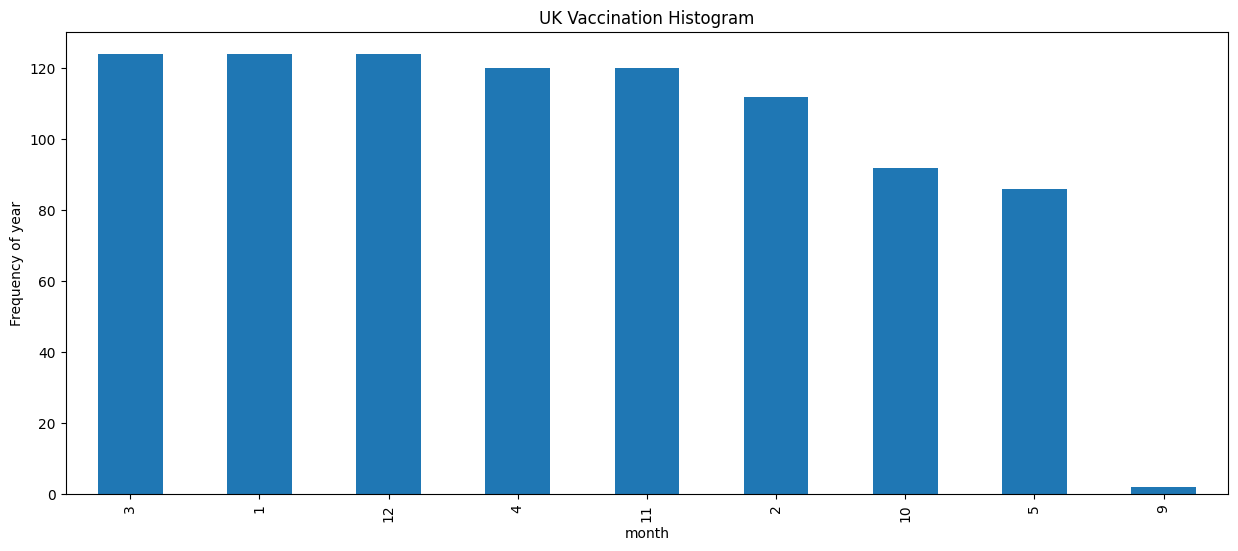

In [92]:
plt.figure(figsize=(15, 6))
plt1 = uk_vacc.month.value_counts().plot(kind='bar')
plt.title('UK Vaccination Histogram')
plt1.set(xlabel = 'month', ylabel='Frequency of year')
plt.show()

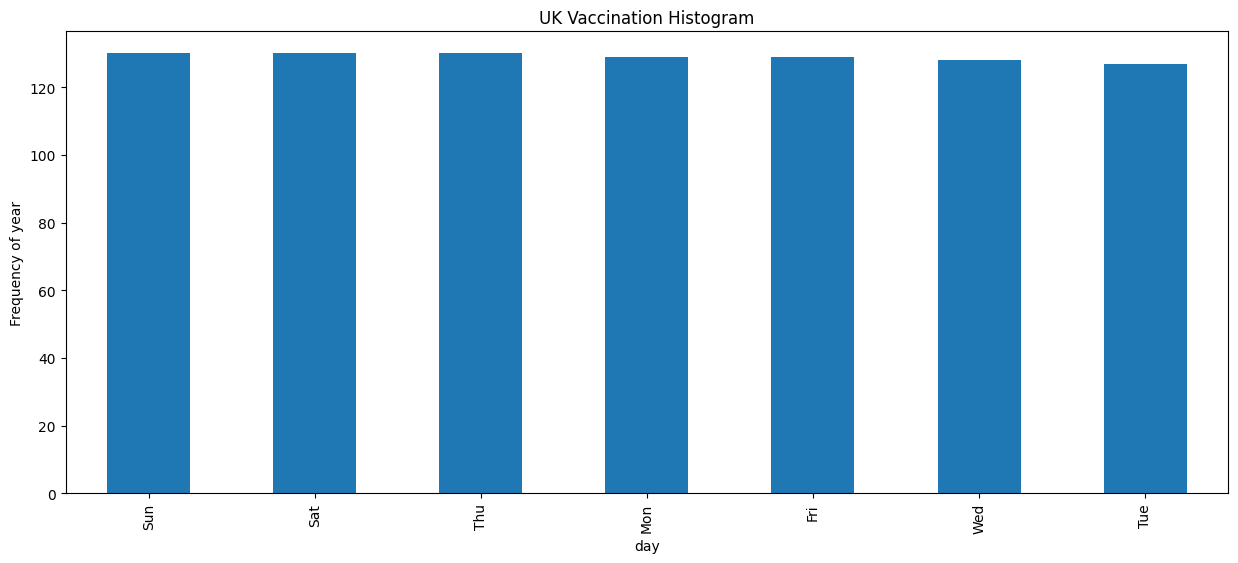

In [93]:
plt.figure(figsize=(15, 6))
plt1 = uk_vacc.day.value_counts().plot(kind='bar')
plt.title('UK Vaccination Histogram')
plt1.set(xlabel = 'day', ylabel='Frequency of year')
plt.show()

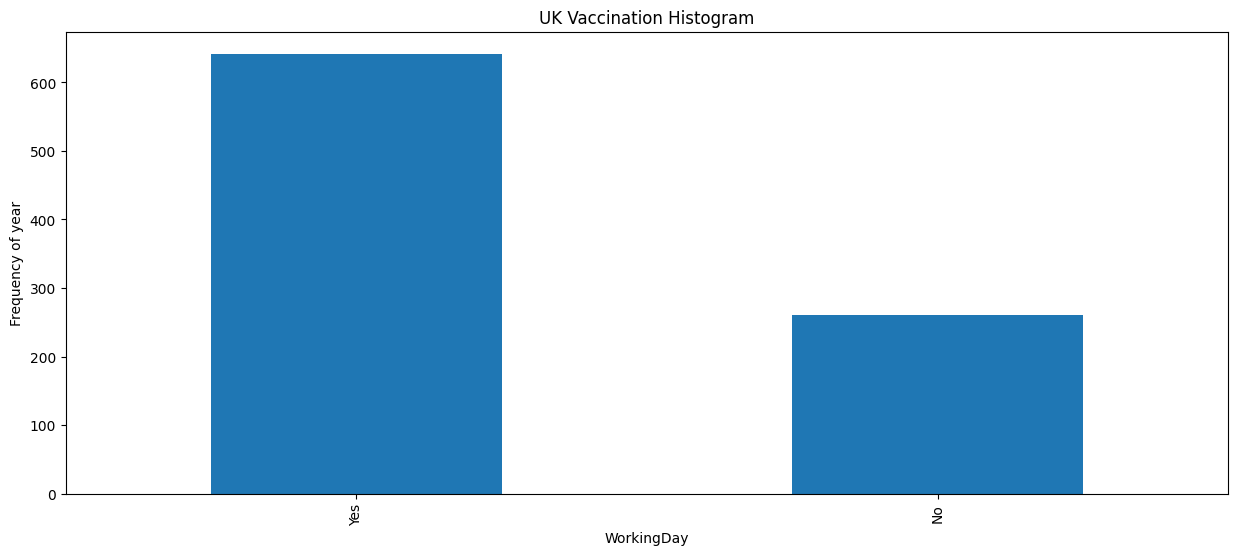

In [94]:
plt.figure(figsize=(15, 6))
plt1 = uk_vacc.WorkingDay.value_counts().plot(kind='bar')
plt.title('UK Vaccination Histogram')
plt1.set(xlabel = 'WorkingDay', ylabel='Frequency of year')
plt.show()

In [ ]:
plt.figure(figsize=(15, 6))
plt1 = uk_vacc.Booster.value_counts().plot(kind='bar')
plt.title('UK Vaccination Histogram')
plt1.set(xlabel = 'Booster', ylabel='Frequency of year')
plt.show()

### Question 5

Build a contingency table of two potentially related categorical variables. Conduct a statistical test of the independence between them and interpret the results

In [103]:
# plt.figure(figsize=(15, 6))

# plt.subplot(1,2,1)
# plt.title('areaName Histogram')
# sns.countplot(uk_vacc.areaName)

# plt.subplot(1,2,2)
# plt.title('areaName vs WorkingDay')
# (sns.boxplot(x=uk_vacc.areaName, y=uk_vacc.WorkingDay).tick_params(axis='y', labelsize=7))

# # plt.show()